## Notebook for the MFT calculation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import math

### first calculate polymer free energy in the bulk solution

In [2]:
def F_9MER_Bulk(phi, Jb):
    F9MER_bulk = -(phi**2)*2*Jb + (1-phi)*np.log(1-phi) - (phi/9)*np.log(9/phi) - (phi/9)*np.log(193983)
    return F9MER_bulk/phi

In [3]:
phi_list_bulk = np.arange(0.05,1,0.0125)
F9_Jbs_bulk=[]
Jbs_bulk = [0,0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.7] 

for each in Jbs_bulk:
    f9_bulk=[]
    for eac in phi_list_bulk:
        f9_bulk.append(F_9MER_Bulk(eac, each))
    F9_Jbs_bulk.append(f9_bulk)

Text(0.75, -1.3, '$J_p$')

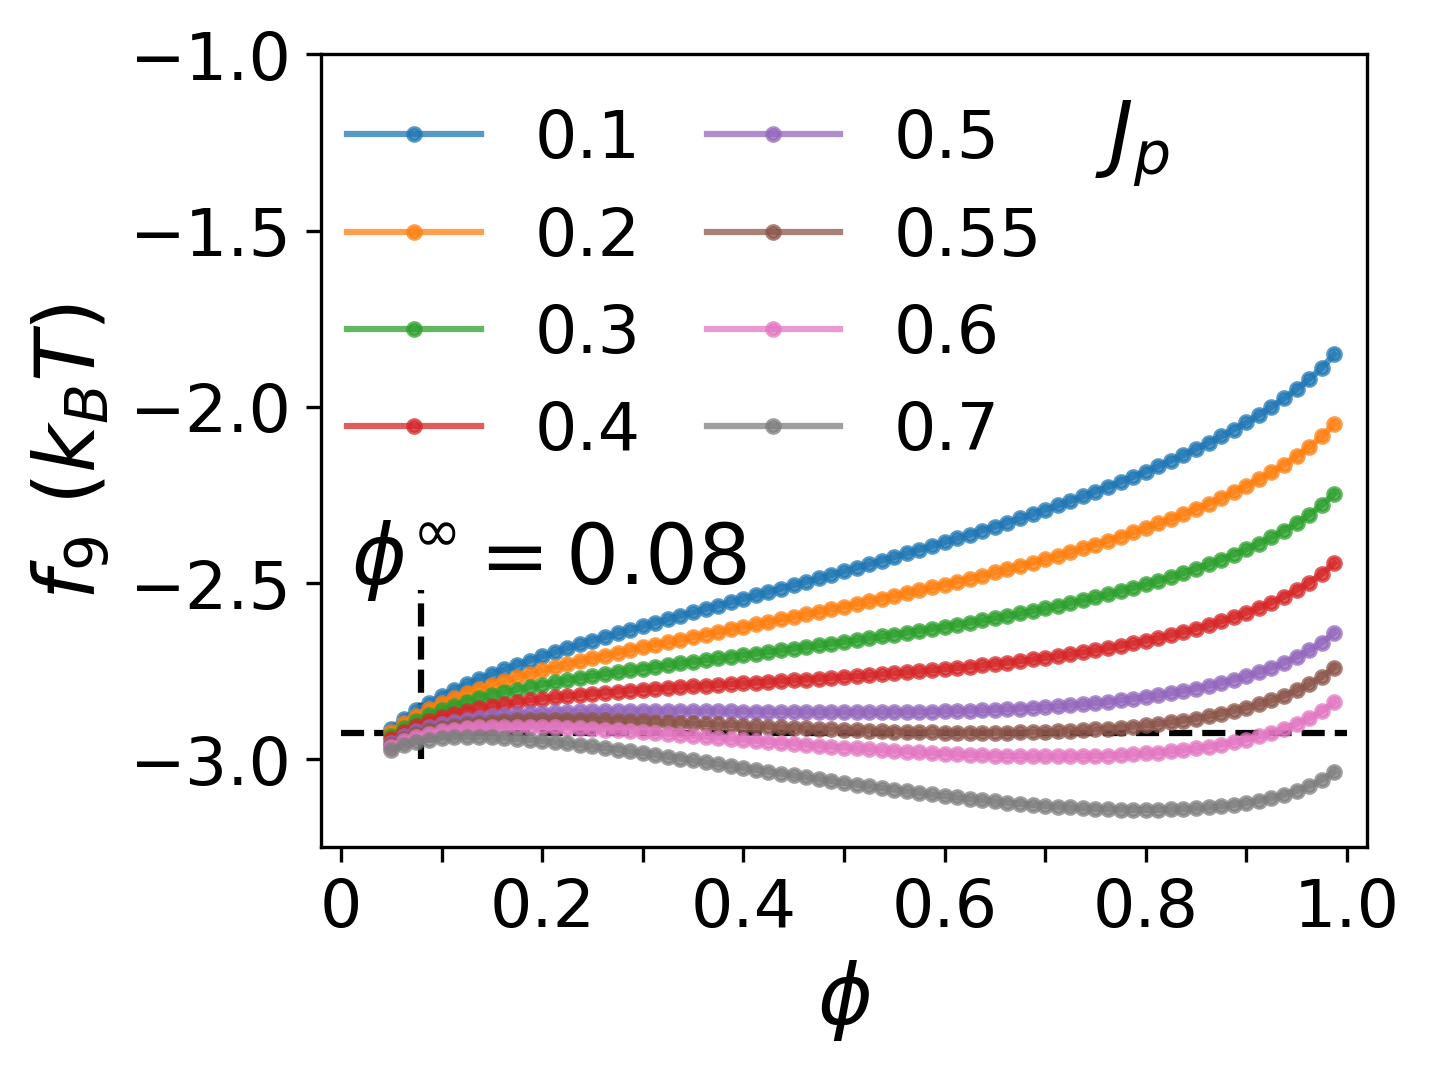

In [15]:
# Plot the bulk free energy
Bulk_free_energy_Plot = plt.figure(figsize=(4.5,3.5),dpi=300)
bulk_F_P = Bulk_free_energy_Plot.add_subplot(111)
for i in range(1,len(F9_Jbs_bulk)):
    bulk_F_P.plot(phi_list_bulk, F9_Jbs_bulk[i], '.-', label=str(round(Jbs_bulk[i],2)), alpha=0.75)
# plt.plot(phi_list,F9[0],'.')
# plt.plot(phi_list,F9[-1],'.')
bulk_F_P.set_xticks(np.arange(0,1.05,0.1))
bulk_F_P.set_xticklabels([0,'',0.2,'',0.4,'',0.6,'',0.8,'',1.0])
bulk_F_P.set_yticks(np.arange(-3.5,-0.9,0.5))
bulk_F_P.set_xlabel('$\phi$',fontsize=20)
bulk_F_P.set_ylabel('$f_9$ ($k_BT$)', fontsize=20)
# bulk_F_P.set_title('free energy per monomer in bulk')
bulk_F_P.set_ylim([-3.25,-1])
bulk_F_P.set_xlim([-0.02,1.02])
bulk_F_P.tick_params(labelsize=16)
bulk_F_P.legend(loc=[0,0.45],fontsize=16,ncol=2,frameon=False,columnspacing=1)
bulk_F_P.hlines(-2.925,0.,1,linestyles='dashed')
bulk_F_P.vlines(0.08,-3.,-2.52,linestyles='dashed')
bulk_F_P.text(0.01,-2.5,'$\phi^{\infty}=0.08$',fontsize=20)
bulk_F_P.text(0.75,-1.3,'$J_p$',fontsize=20)

### calculation of the F_3D term

In [6]:
def Ibulk_integrand(x, Jb, K=1, c9=193983, L=9, f9inf=-3):
    return np.sqrt( 2*K* (-x*x*2*Jb+(1-x)*np.log(1-x)-x/L*np.log(L/x)-x/L*np.log(c9)-f9inf*x) )

In [8]:
phi_list_condensate = np.arange(0.05,1,0.0125)
Jbs_condensate = np.arange(0,0.6,0.05)

In [9]:
I_bulk = []
for jb in Jbs_condensate:
    i_bulk=[]
    for phi0 in phi_list_condensate:
        if phi0<0.08:
            i_bulk.append(integrate.quad(Ibulk_integrand, phi0, 0.08, args=(jb)))
        else:
            i_bulk.append(integrate.quad(Ibulk_integrand, 0.08, phi0, args=(jb)))
    I_bulk.append(i_bulk)

In [11]:
'''The 1st term in F3D, for the loss of conformational entropy of IDP in surface condensate'''
D =5
f9inf=-2.93
L=9
C9surf = 112325

F_3D_1 = [] 
for jb in Jbs_condensate:
    f3d_1=[]
    for phi0 in phi_list_condensate:
        f3d_1.append(D*phi0*( (1-phi0)/phi0*np.log(1-phi0)-1/L*np.log(L/phi0)-np.log(C9surf)/L-f9inf ) )
    F_3D_1.append(f3d_1)
    
    
'''The 2nd term in F3D'''

F_3D_2 = [] 
for jb in Jbs_condensate:
    f3d_2=[]
    for phi0 in phi_list_condensate:
        f3d_2.append(-jb*D*phi0*phi0*2)
    F_3D_2.append(f3d_2)

In [12]:
'''Now we combine the above 3 terms to get the value of F3D for different Jp at various phi0'''

F_3D = []
for i in range(len(Jbs_condensate)):
    f3d=[]
    for j in range(len(phi_list_condensate)):
        F_3D_dilute_base = I_bulk[i][2][0]+F_3D_1[i][2]+F_3D_2[i][2]
        f3d.append(I_bulk[i][j][0]+F_3D_1[i][j]+F_3D_2[i][j] - F_3D_dilute_base)
    F_3D.append(f3d)

Text(0.07, 2.0, '$\\phi^{\\infty}=0.08$')

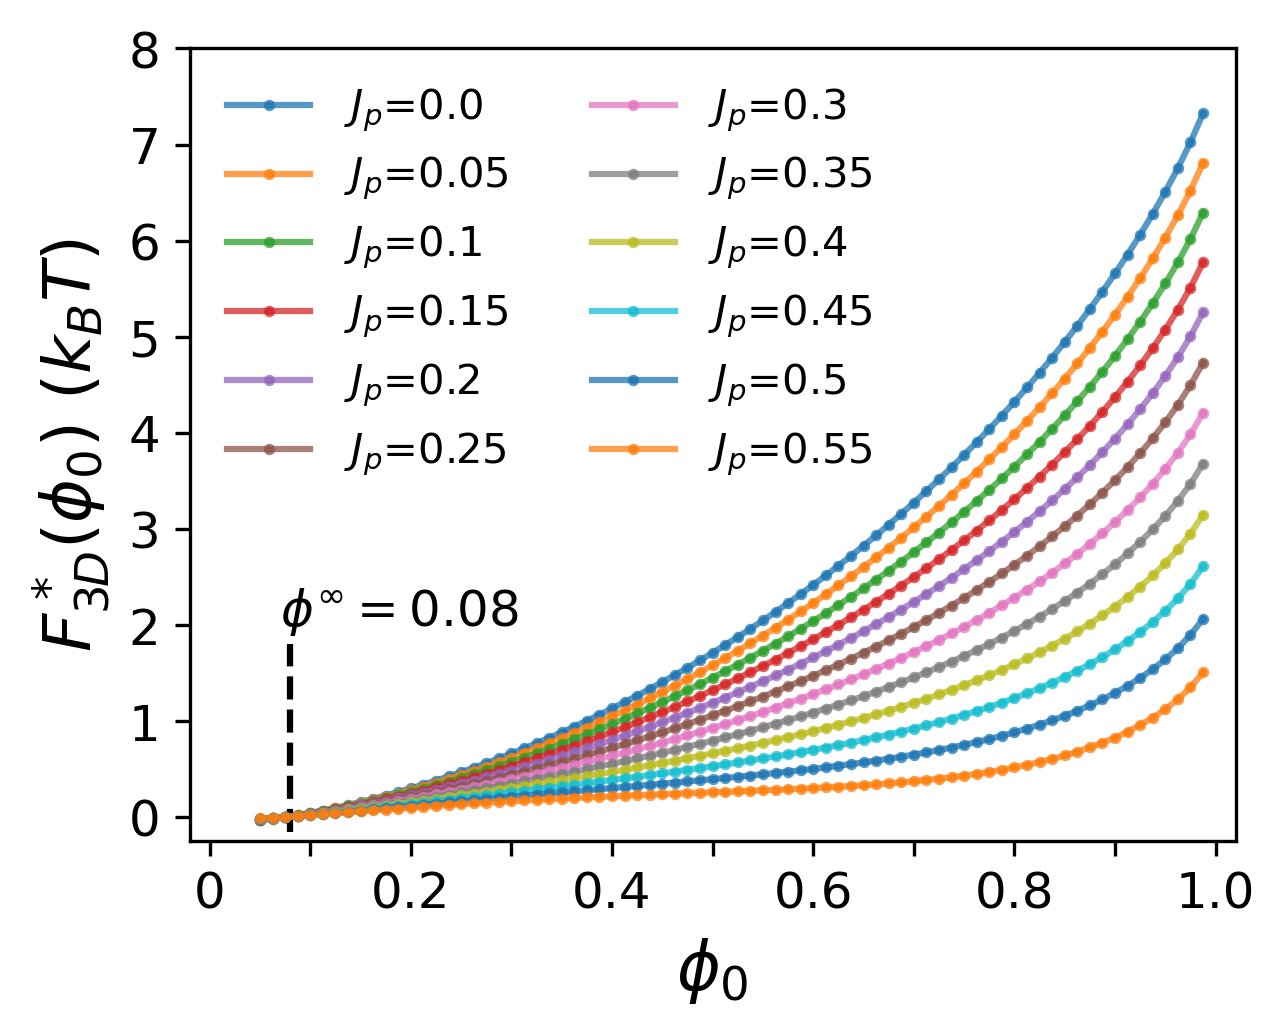

In [14]:
# Plot F_3D

F_3D_Plot = plt.figure(figsize=(4.5,3.5),dpi=300)
F3D_P = F_3D_Plot.add_subplot(111)
for i in range(len(F_3D)):
    F3D_P.plot(phi_list_condensate, F_3D[i], '.-', label='$J_p$='+str(round(np.arange(0,0.6,0.05)[i],2)), alpha=0.75,markersize=3.5)
# plt.plot(phi_list,F9[0],'.')
# plt.plot(phi_list,F9[-1],'.')
F3D_P.set_xticks(np.arange(0.0,1.05,0.1))
F3D_P.set_xticklabels([0,'',0.2,'',0.4,'',0.6,'',0.8,'',1.0])
F3D_P.set_yticks(np.arange(0,9,1))
F3D_P.set_xlabel('$\phi_0$',fontsize=16)
F3D_P.set_ylabel('$F_{3D}^*(\phi_0)$ ($k_BT$)',fontsize=16)
# F3D_P.set_title('$F_{3D}(\phi_0)$')
F3D_P.set_ylim([-0.25,8])
F3D_P.set_xlim([-0.02,1.02])
F3D_P.tick_params(labelsize=12)
F3D_P.legend(loc='upper left',fontsize=10,ncol=2, frameon=False)
F3D_P.vlines(0.08,-0.15,1.8,linestyles='dashed')
F3D_P.text(0.07,2.,'$\phi^{\infty}=0.08$',fontsize=12)

In [16]:
F_3D_Gradient = []
for each in F_3D:
    f3d_gradient=[(each[1]-each[0])/(phi_list_condensate[3]-phi_list_condensate[2])]
    for i in np.arange(1, len(each)-1,1):
        f3d_gradient.append((each[i+1]-each[i-1])/(phi_list_condensate[4]-phi_list_condensate[2]))
    f3d_gradient.append((each[-1]-each[-2])/(phi_list_condensate[3]-phi_list_condensate[2]))
    F_3D_Gradient.append(f3d_gradient)

Text(0.02, 5.0, '$\\phi^{\\infty}=0.08 $')

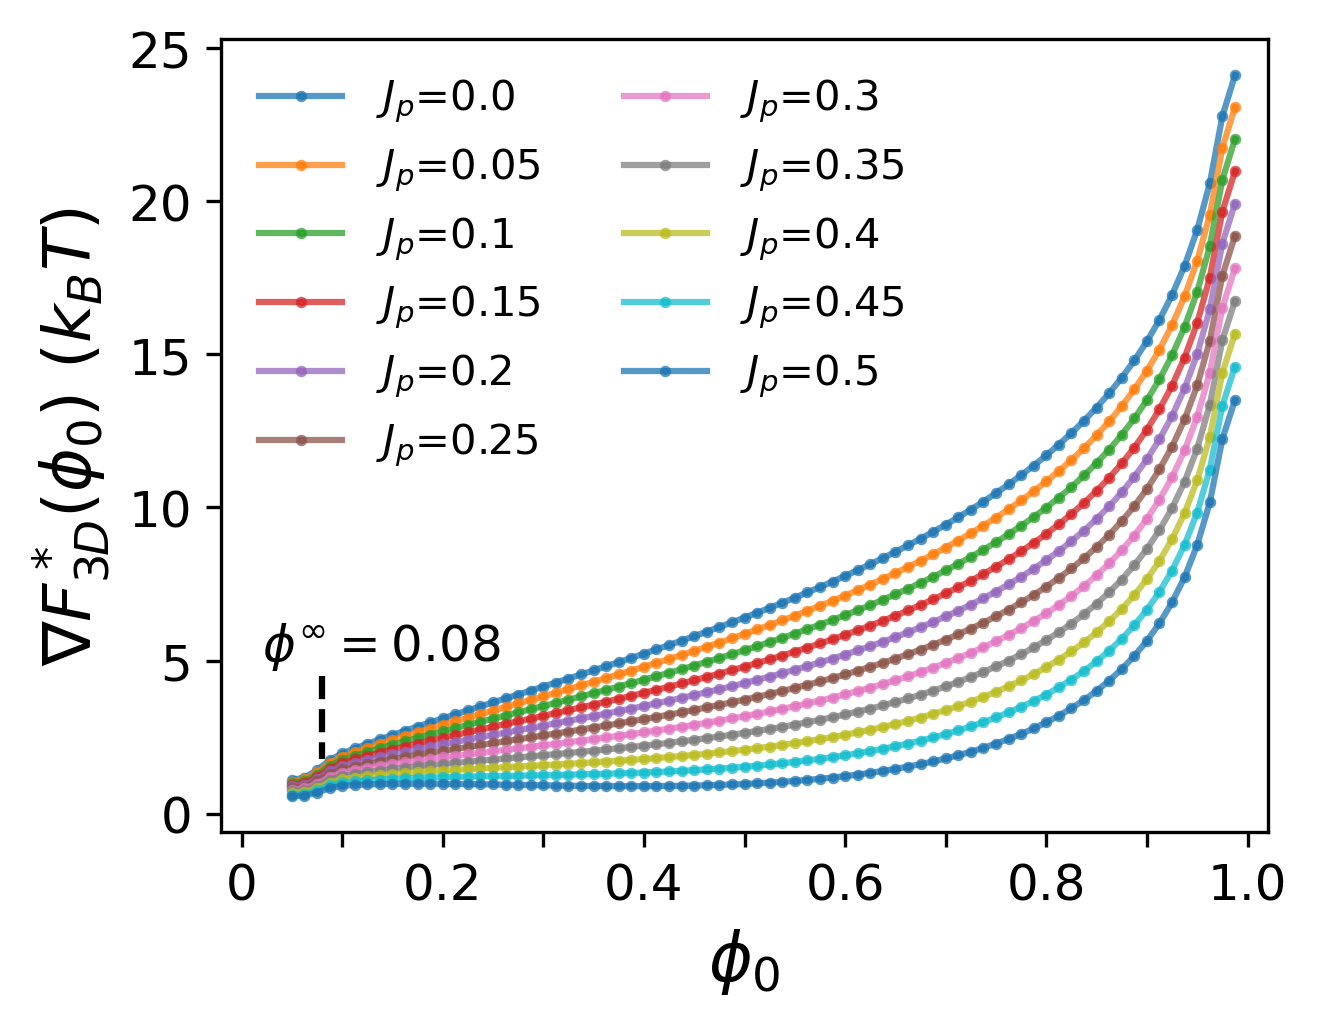

In [18]:
F_3D_Gradient_Plot = plt.figure(figsize=(4.5,3.5),dpi=300)
F3D_Grad_P = F_3D_Gradient_Plot.add_subplot(111)
for i in range(len(F_3D_Gradient)-1):
    F3D_Grad_P.plot(phi_list_condensate, F_3D_Gradient[i], '.-', label='$J_p$='+str(round(np.arange(0,0.6,0.05)[i],2)), alpha=0.75,markersize=3.5)
# F3D_Grad_P.plot(phi_list_condensate, -np.asarray(F_2D_Gradient), '--',color='black', alpha=0.6, label=r'$- \nabla F_{2D}^*(\phi_0)$')
# plt.plot(phi_list,F9[0],'.')
# plt.plot(phi_list,F9[-1],'.')
F3D_Grad_P.set_xticks(np.arange(0,1.05,0.1))
F3D_Grad_P.set_xticklabels([0,'',0.2,'',0.4,'',0.6,'',0.8,'',1.0])
# F3D_Grad_P.set_yticks(np.arange(0,9,1))
F3D_Grad_P.set_xlabel('$\phi_0$',fontsize=16)
F3D_Grad_P.set_ylabel(r'$ \nabla F_{3D}^*(\phi_0)}$ ($k_BT$)',fontsize=16)
# F3D_Grad_P.set_title('t = {0:}'.format(t) + ', $f_{obstacle}$'+'={0:}'.format(r_obstacle))
F3D_Grad_P.set_xlim([-0.02,1.02])
F3D_Grad_P.tick_params(labelsize=12)
F3D_Grad_P.legend(loc='upper left',fontsize=10,ncol=2,frameon=False)
F3D_Grad_P.vlines(0.08,4.5,1.8,linestyles='dashed')
F3D_Grad_P.text(0.02,5.,'$\phi^{\infty}=0.08 $',fontsize=12)

### calculation of the F_2D term

In [22]:
m_surf = np.arange(-0.95,1,0.00625)
rho_surf = np.arange(0.05,1,0.00625)

r_obstacle = 0.3 # obstacle fraction
Jm=0.2

lambda_m = -0.05
h_teth =  0.7 #kT
D=5

lambda_rho =  -0.05 #1.5

In [21]:
def F_mem(mm, fo, Jmem, Z=4):
    a=(1+mm)/2
    return -(Z/2)*(mm**2)*Jmem*((1-fo)**2) + (1-fo)*(a*np.log(a)+(1-a)*np.log(1-a)) 

F_2D_mem = []
for m in m_surf:
    F_2D_mem.append(F_mem(m, r_obstacle, Jm)- lambda_m*m*(1-r_obstacle))

F_2D_int = []
for phi0 in phi_list_condensate:
    f2d_int_phi0 = []
    for m in m_surf:
        f2d_int_phi0_m = []
        for rho in rho_surf:
            f2d_int_phi0_m.append(-h_teth*D*phi0*rho*(1-r_obstacle)*(1+m)/2)
        f2d_int_phi0.append(f2d_int_phi0_m)
    F_2D_int.append(f2d_int_phi0)

In [24]:
F_2D_teth = []

for m in m_surf:
    f2d_teth = []
    for rho in rho_surf:
        rho_prm = rho*(1-r_obstacle)*(1+m)/2
        combinatorial = ( rho*np.log(rho) + (1-rho)*np.log(1-rho) )*(1-r_obstacle)*(1+m)/2
        f2d_teth.append(-lambda_rho*rho_prm + combinatorial)        
    F_2D_teth.append(f2d_teth)

In [25]:
def findmin(listoflist):
    sumpool=[]
    for elist in listoflist:
        for eterm in elist:
            sumpool.append(eterm)
    minval = min(sumpool)
    
    for i in range(len(listoflist)):
        for j in range(len(listoflist[i])):
            if listoflist[i][j]==minval: 
                m_rho_min = [m_surf[i], rho_surf[j]]
            
    return [minval, m_rho_min]

In [26]:
# Now find the minimum F_2D at each phi0
F_2D=[]

for i in range(len(phi_list_condensate)):
    f2d_phi0 = []
    for j in range(len(m_surf)):
        f2d_phi0_m = []
        for k in range(len(rho_surf)):
            f2d_phi0_m.append(F_2D_mem[j]+F_2D_int[i][j][k]+F_2D_teth[j][k])
        f2d_phi0.append(f2d_phi0_m)
    F_2D.append(f2d_phi0)
    
dilute_F2D_base = findmin(F_2D[2])[0]
M_Rho_min_info=[]
F_2D_min = []
for each in F_2D:
    F_2D_min.append(findmin(each)[0]-dilute_F2D_base)
    M_Rho_min_info.append(findmin(each)[1])

In [27]:
F_2D_Gradient = [(F_2D_min[1]-F_2D_min[0])/(phi_list_condensate[3]-phi_list_condensate[2])]
for i in np.arange(1, len(F_2D_min)-1,1):
    F_2D_Gradient.append((F_2D_min[i+1]-F_2D_min[i-1])/(phi_list_condensate[4]-phi_list_condensate[2]))
F_2D_Gradient.append((F_2D_min[-1]-F_2D_min[-2])/(phi_list_condensate[3]-phi_list_condensate[2]))

(-3.0, 1.0)

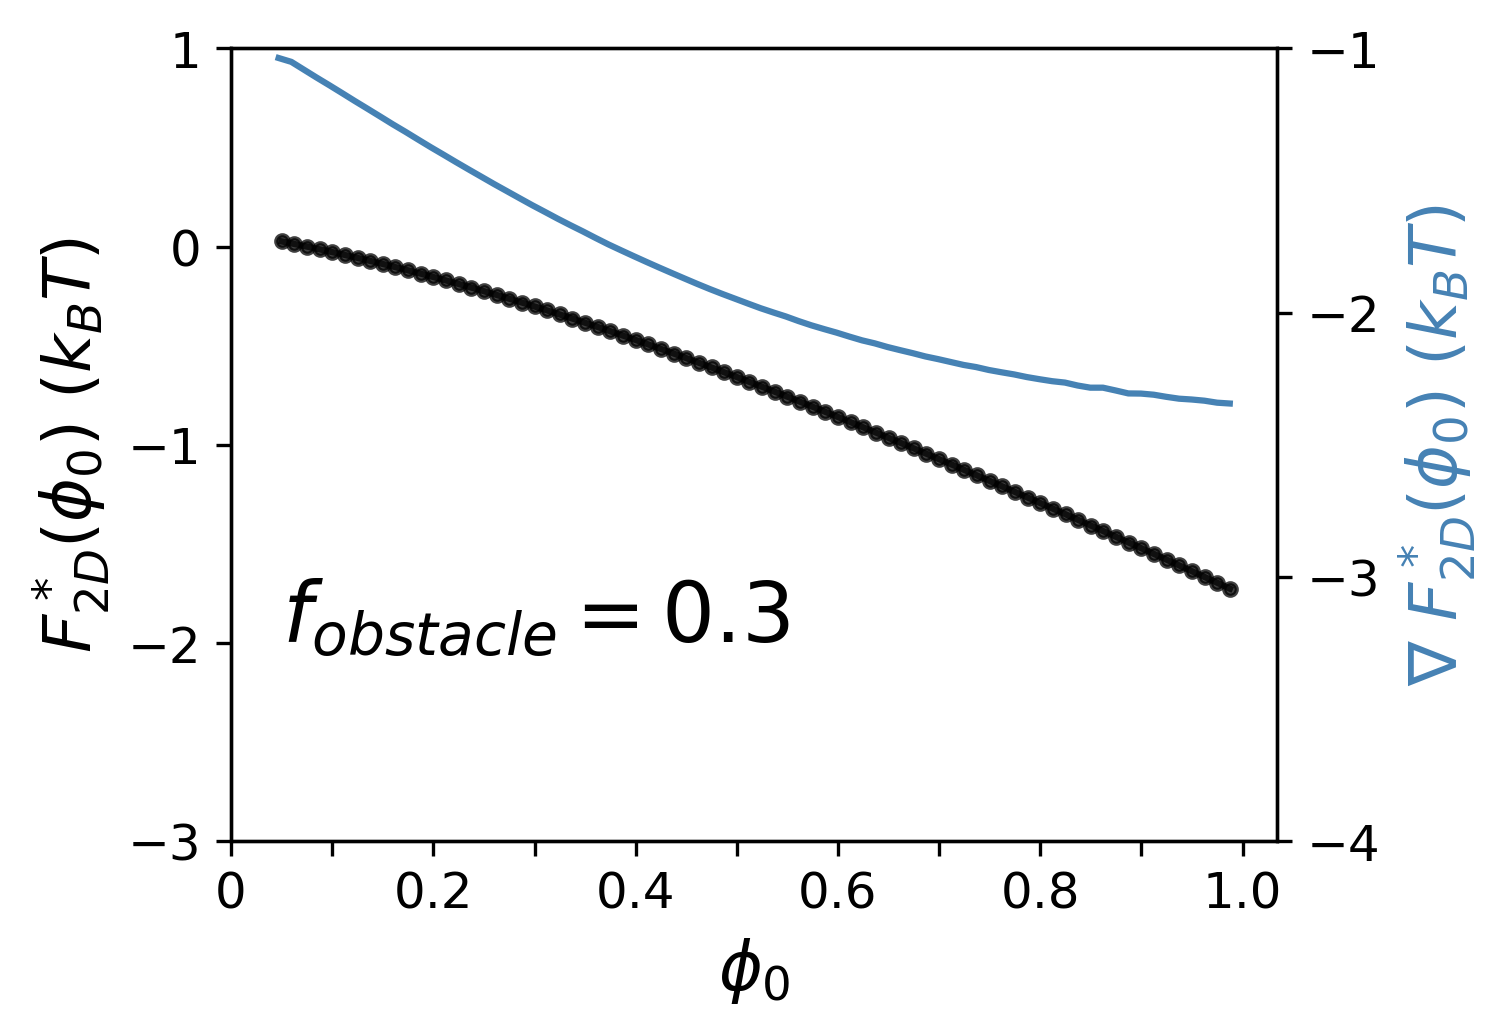

In [29]:
# plot F2D and its gradient
F_2D_Plot = plt.figure(figsize=(4.5,3.5),dpi=300)
F2D_P = F_2D_Plot.add_subplot(111)
F2D_P.plot(phi_list_condensate, F_2D_min, '.-', alpha=0.75, c='black')
F2D_P_ax2 = F2D_P.twinx()
# F2D_P_ax2.plot(phi_list_condensate, smooth_list(F_2D_Gradient),'.' ,color='steelblue')
F2D_P_ax2.plot(phi_list_condensate, F_2D_Gradient ,color='steelblue')

F2D_P_ax2.set_ylabel(r'$\nabla$ $F_{2D}^*(\phi_0)$ ($k_BT$)',color='steelblue',fontsize=16)
# F2D_P_ax2.set_yticks(np.arange(-4,0,1))
F2D_P_ax2.set_yticks(np.arange(-4,1,1))
F2D_P_ax2.set_ylim([-4,-1])
F2D_P_ax2.tick_params(labelsize=12)

F2D_P.set_xticks(np.arange(0,1.05,0.1))
F2D_P.set_xticklabels([0,'',0.2,'',0.4,'',0.6,'',0.8,'',1.0])
# F2D_P.set_yticks(np.arange(-3,1,1))
F2D_P.set_yticks(np.arange(-4,2,1))
F2D_P.set_xlabel('$\phi_0$',fontsize=16)
F2D_P.set_ylabel('$F_{2D}^*(\phi_0)$ ($k_BT$)',color='black',fontsize=16)
# F2D_P.set_title('t = {0:}'.format(t) + ', $f_{obstacle}$'+'={0:}'.format(r_obstacle))
# F2D_P.text(0.55,-0.5,'$f_{obstacle}=0$',fontsize=20)
F2D_P.text(0.05,-2.,'$f_{obstacle}=0.3$',fontsize=20)
F2D_P.tick_params(labelsize=12)
F2D_P.set_ylim([-3,1])

In [30]:
MIN_Locate =[]
for j in np.arange(8,11): 
    minvalinit=1
    for i in np.arange(2,76,1):
        dist=(F_3D[j][i]+F_2D_min[i])
        if dist<=minvalinit:
            minvalinit= (dist-0)
            min_locate = [phi_list_condensate[i], F_3D[j][i]+F_2D_min[i]]
    MIN_Locate.append(min_locate)

In [31]:
Condenstate_densities = [eac[0] for eac in MIN_Locate]

Text(0.7, 5, '$J_p$')

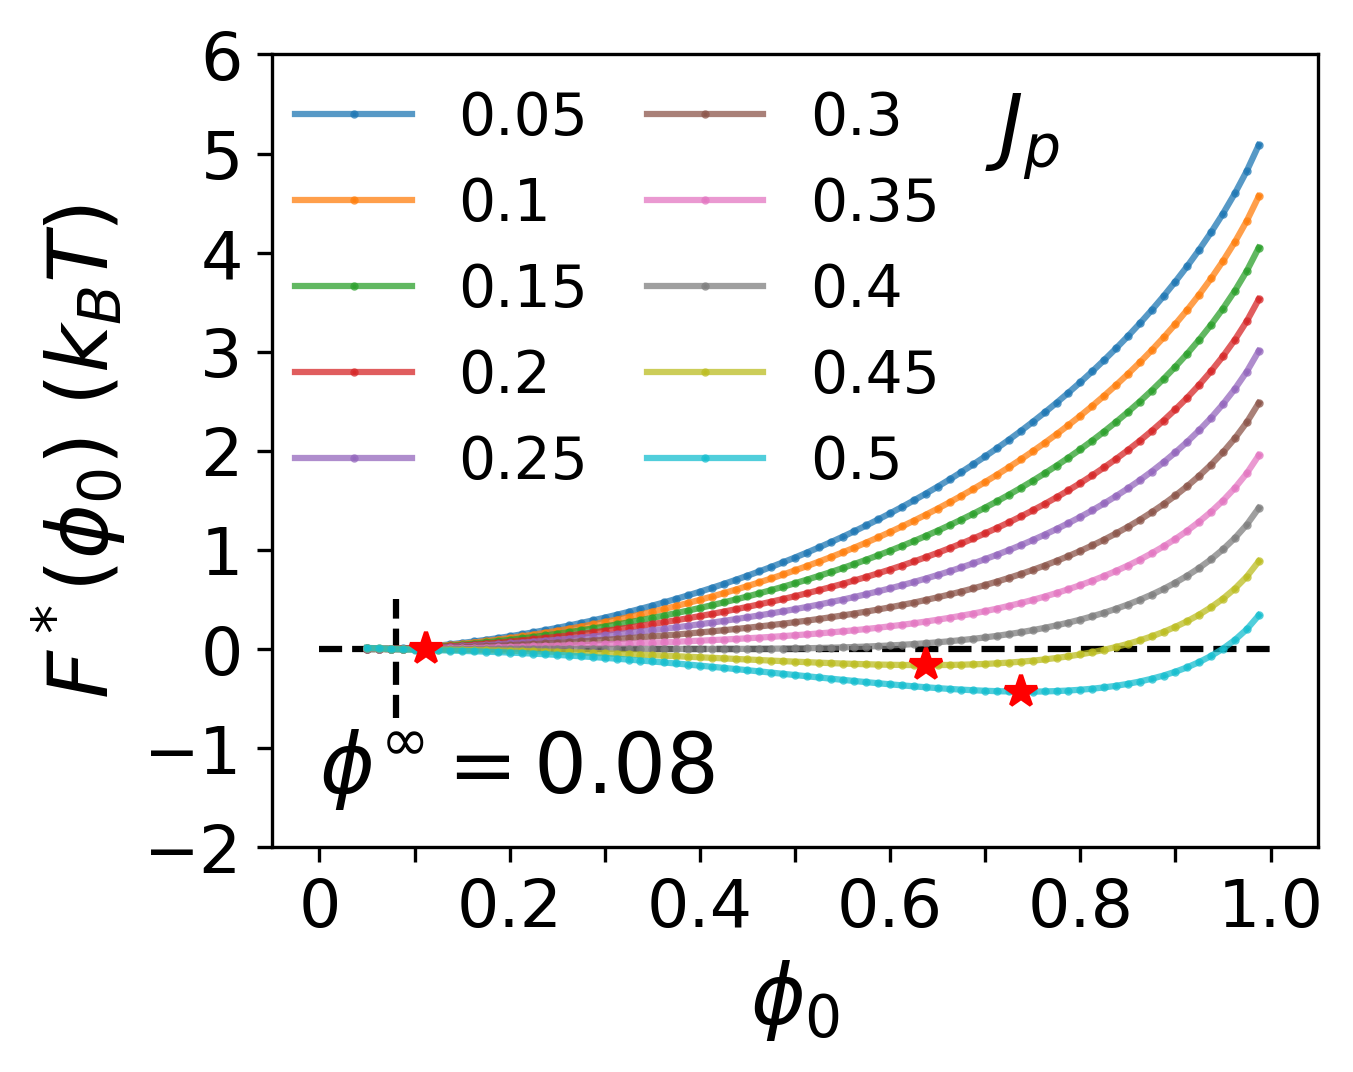

In [33]:
# Free energy plot
F_Plot = plt.figure(figsize=(4.5,3.5),dpi=300)
F_P = F_Plot.add_subplot(111)
for i in range(1,len(F_3D)-1):
    F_P.plot(phi_list_condensate, (np.asarray(F_3D[i])+np.asarray(F_2D_min)), '.-', label=str(round(np.arange(0,0.6,0.05)[i],2)), alpha=0.75, markersize=2)

for each in MIN_Locate:
    F_P.plot(each[0], each[1],'r*',markersize=8)

F_P.set_xticks(np.arange(0,1.05,0.1))
F_P.set_xticklabels([0,'',0.2,'',0.4,'',0.6,'',0.8,'',1.0])
# F_P.set_yticks(np.arange(-2,4.2,1))
F_P.set_yticks(np.arange(-2,7,1))
F_P.set_xlabel('$\phi_0$',fontsize=20)
F_P.set_ylabel('$F^*(\phi_0)$ ($k_BT$)',fontsize=20)
# F_P.set_title('t = {0:}'.format(t) + ', $f_{obstacle}$'+'={0:}'.format(r_obstacle))
# F_P.set_ylim([-1,6])
F_P.set_ylim([-2,6])
F_P.tick_params(labelsize=16)
F_P.legend(loc=[0,0.42],fontsize=14,ncol=2,frameon=False, columnspacing=1)
F_P.vlines(0.08,-0.7,0.5,linestyles='dashed')
# F_P.vlines(0.08,-0.8,0.1,linestyles='dashed')

F_P.hlines(0.,0.0,1,linestyles='dashed')
# F_P.text(0.0,-1.2,'$\phi^{\infty}=0.08$',fontsize=12)
F_P.text(0.0,-1.45,'$\phi^{\infty}=0.08$',fontsize=20)
F_P.text(0.7,5,'$J_p$',fontsize=20)

In [36]:
MIN_Locate =[]
for j in np.arange(1,11): 
    minvalinit=1
    for i in np.arange(2,76,1):
        dist=(F_3D[j][i]+F_2D_min[i])
        if dist<=minvalinit:
            minvalinit= (dist-0)
            min_locate = [phi_list_condensate[i], F_3D[j][i]+F_2D_min[i]]
    MIN_Locate.append(min_locate)

In [37]:
Condenstate_densities = [eac[0] for eac in MIN_Locate]

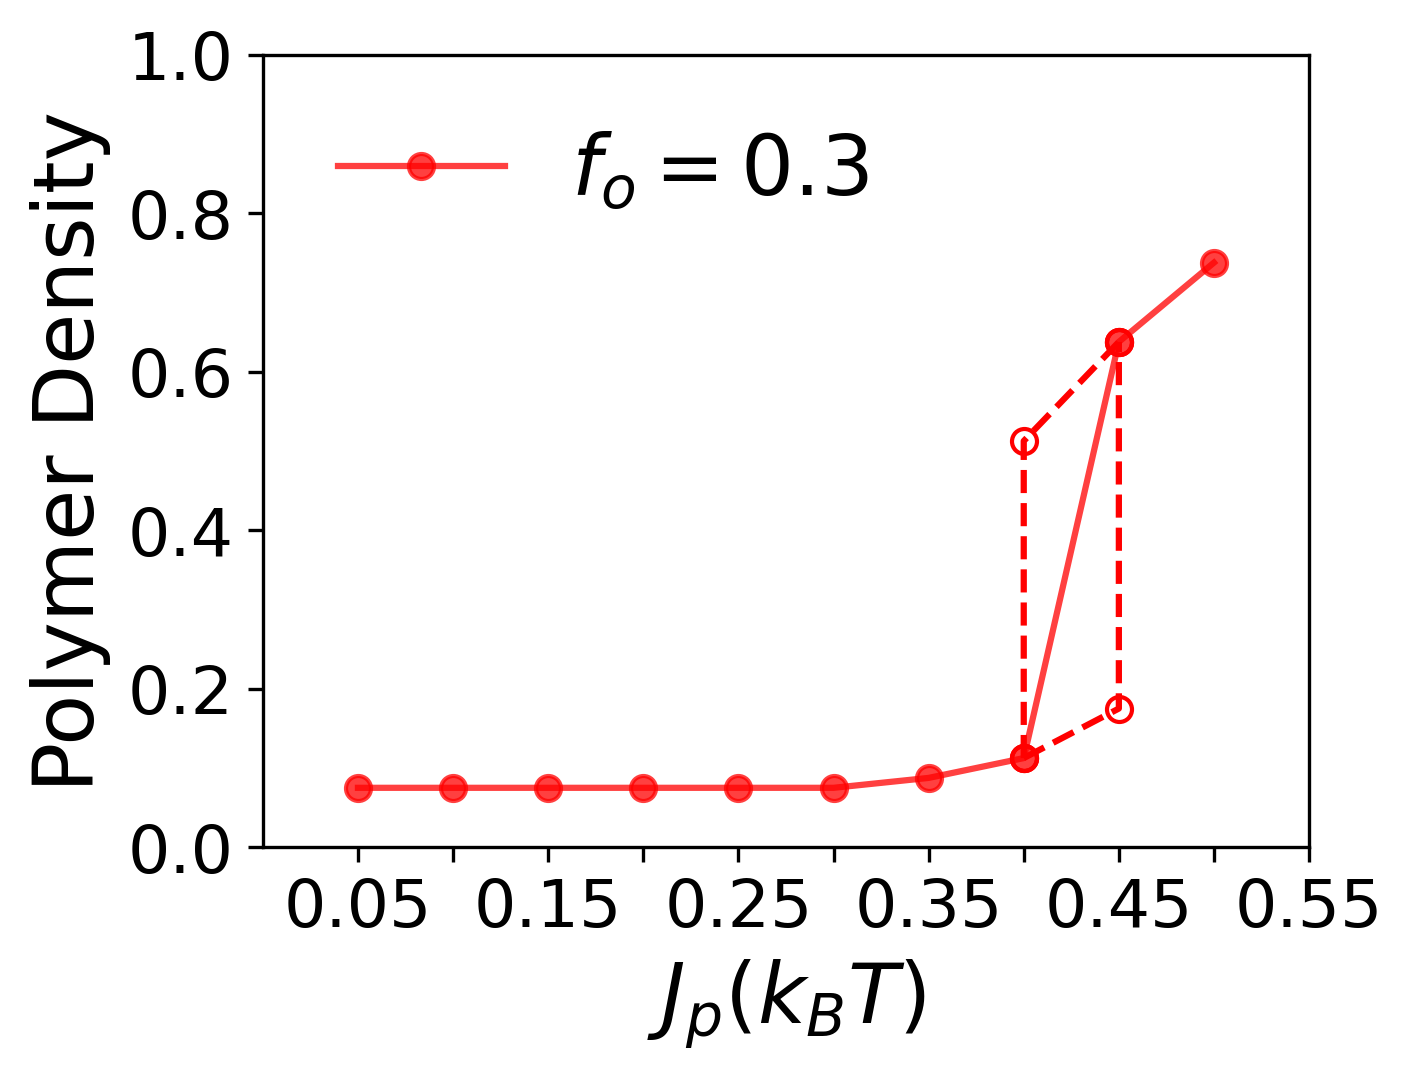

In [56]:
# Plot Fig.4D
sensitivity_Plot = plt.figure(figsize=(4.5,3.5),dpi=300)
S_P = sensitivity_Plot.add_subplot(111)
# S_P.plot(Jbs_condensate[1:11], condensate_densities_fo0d3_Jm0d2_h0d7,'.-',alpha=0.75, markersize=12, color='red', label='$f_{o}=0.3$')
S_P.plot(Jbs_condensate[1:11], Condenstate_densities,'.-',alpha=0.75, markersize=12, color='red', label='$f_{o}=0.3$')

# the values in the two lines below can be obtained easily with the code provided above
S_P.plot([0.4,0.45,0.45], [0.1125,0.175,0.6375], 'r--o', markersize=6, markeredgecolor='red',markerfacecolor='None')
S_P.plot([0.4,0.4,0.45], [0.1125,0.5125,0.6375], 'r--o', markersize=6, markeredgecolor='red',markerfacecolor='None')

# S_P.plot(Jbs_condensate[1:11], condensate_densities_fo0_Jm0d2_h0d7,'.-',alpha=0.75, markersize=12, label='$f_{o}=0$')
# repeat the above calculations for obstacle fraction =0 to obtained the data used in the line above

S_P.set_xticks(np.arange(0.05,0.6,0.05))
S_P.set_xticklabels([0.05,'',0.15,'',0.25,'',0.35,'',0.45,'',0.55])
S_P.tick_params(labelsize=16)
S_P.set_xlabel('$J_p(k_BT)$',fontsize=20)
S_P.set_ylabel('Polymer Density',fontsize=20)
# S_P.set_title('t = {0:}'.format(t) + ', $f_{obstacle}$'+'={0:}'.format(r_obstacle))
S_P.set_ylim([0.,1])
S_P.set_xlim([0.,0.55])
S_P.legend(loc='upper left',fontsize=20,ncol=1,frameon=False)

In [43]:
def Mrho_mininfo_to_xAstar_rhostar(mrhomininfo):
    xAstar, rhostar = [], []
    for each in mrhomininfo:
        xAstar.append(each[0]/2+0.5)
        rhostar.append(each[1])
    
    return [xAstar, rhostar]

In [49]:
M_Rho_min_info = []
for each in (MIN_Locate):
    for i in range(len(phi_list_condensate)):
        if phi_list_condensate[i]==each[0]:
            M_Rho_min_info.append(findmin(F_2D[i])[1])

In [51]:
xAstar_fo0d3_Jm0d2_h0d7 = Mrho_mininfo_to_xAstar_rhostar(M_Rho_min_info)[0]
rhostar_fo0d3_Jm0d2_h0d7 = Mrho_mininfo_to_xAstar_rhostar(M_Rho_min_info)[1]

In [52]:
# xAstar_fo0_Jm0d2_h0d7 = Mrho_mininfo_to_xAstar_rhostar(M_Rho_min_info)[0]
# rhostar_fo0_Jm0d2_h0d7 = Mrho_mininfo_to_xAstar_rhostar(M_Rho_min_info)[1]

In [53]:
print(np.shape(xAstar_fo0d3_Jm0d2_h0d7))

(10,)


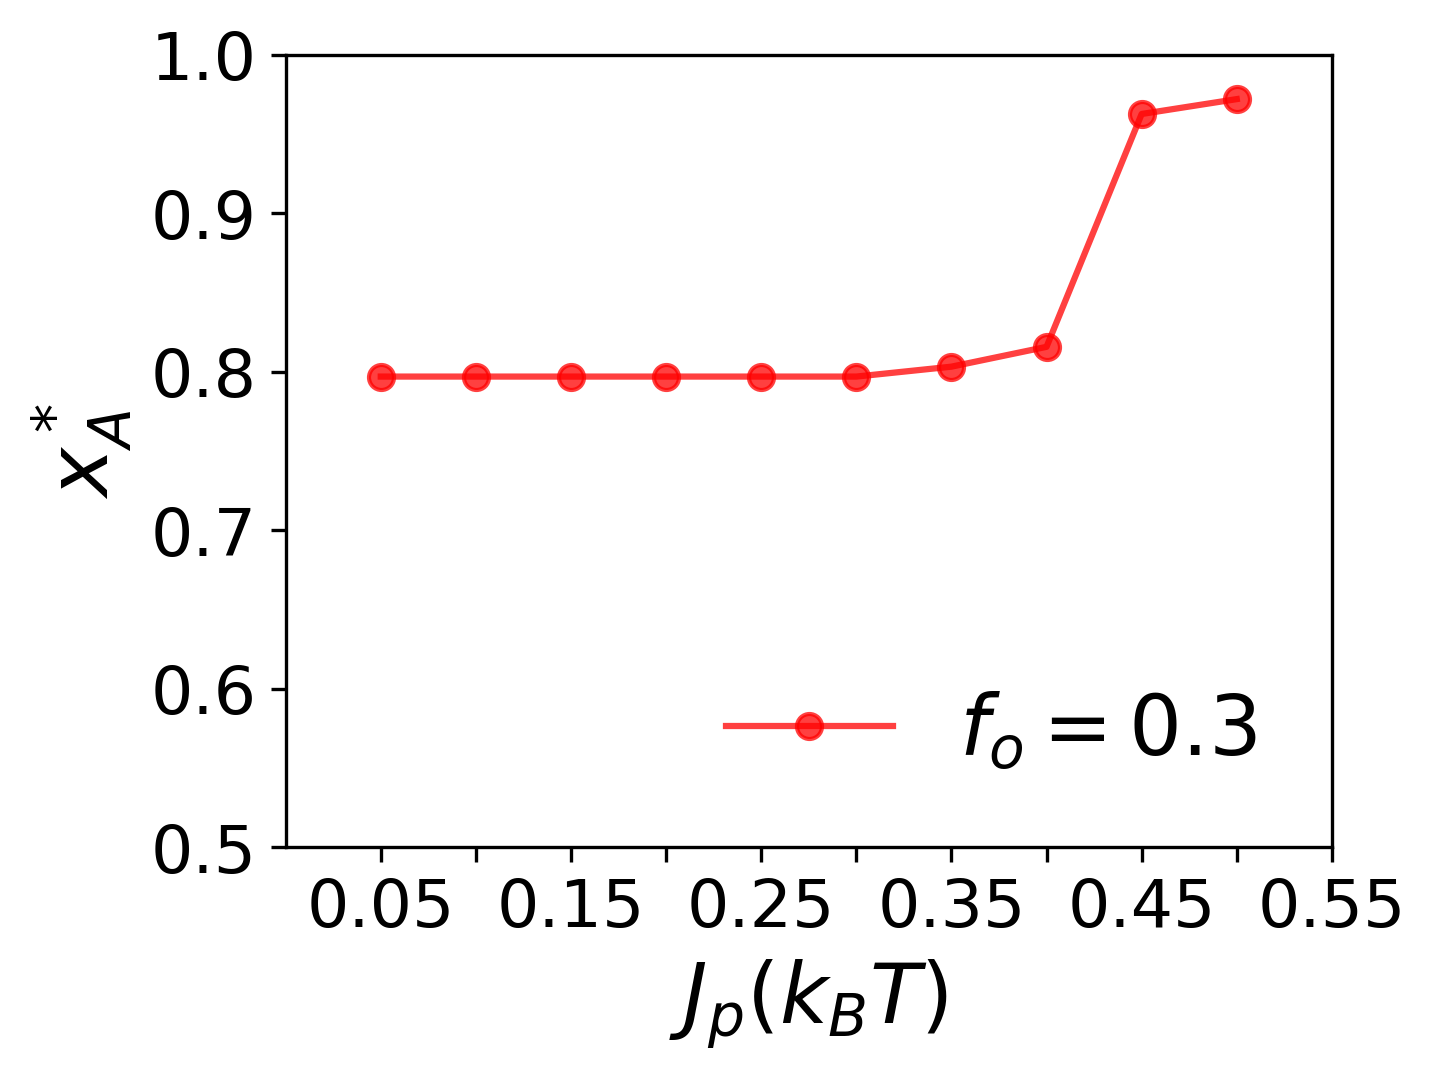

In [57]:
# plot Fig. 4E
sensitivity_Plot_2 = plt.figure(figsize=(4.5,3.5),dpi=300)
S_P2 = sensitivity_Plot_2.add_subplot(111)
S_P2.plot(Jbs_condensate[1:11], xAstar_fo0d3_Jm0d2_h0d7,'.-',alpha=0.75, markersize=12, color='red', label='$f_{o}=0.3$')
# S_P2.plot(Jbs_condensate[1:11], xAstar_fo0_Jm0d2_h0d7,'.-',alpha=0.75, markersize=12, label='$f_{o}=0$')
# repeat the above calculations for obstacle fraction =0 to obtained the data used in the line above

S_P2.tick_params(labelsize=16)
S_P2.set_xticks(np.arange(0.05,0.6,0.05))
S_P2.set_xticklabels([0.05,'',0.15,'',0.25,'',0.35,'',0.45,'',0.55])
# S_P2.set_yticks(np.arange(0,9,1))
S_P2.set_xlabel('$J_p(k_BT)$',fontsize=20)
# S_P2.set_ylabel('$R_{up-spin}*$',fontsize=18)
S_P2.set_ylabel('$x_A^*$',fontsize=20)
# S_P2.set_title('t = {0:}'.format(t) + ', $f_{obstacle}$'+'={0:}'.format(r_obstacle))
S_P2.set_ylim([0.5,1])
S_P2.set_xlim([0.,0.55])
S_P2.legend(loc='lower right',fontsize=20,ncol=1,frameon=False)

In [62]:
rhoprime_0d3=[]
for each in M_Rho_min_info:
    rhoprime_0d3.append((1-r_obstacle)*0.5*(1+each[0])*each[1])

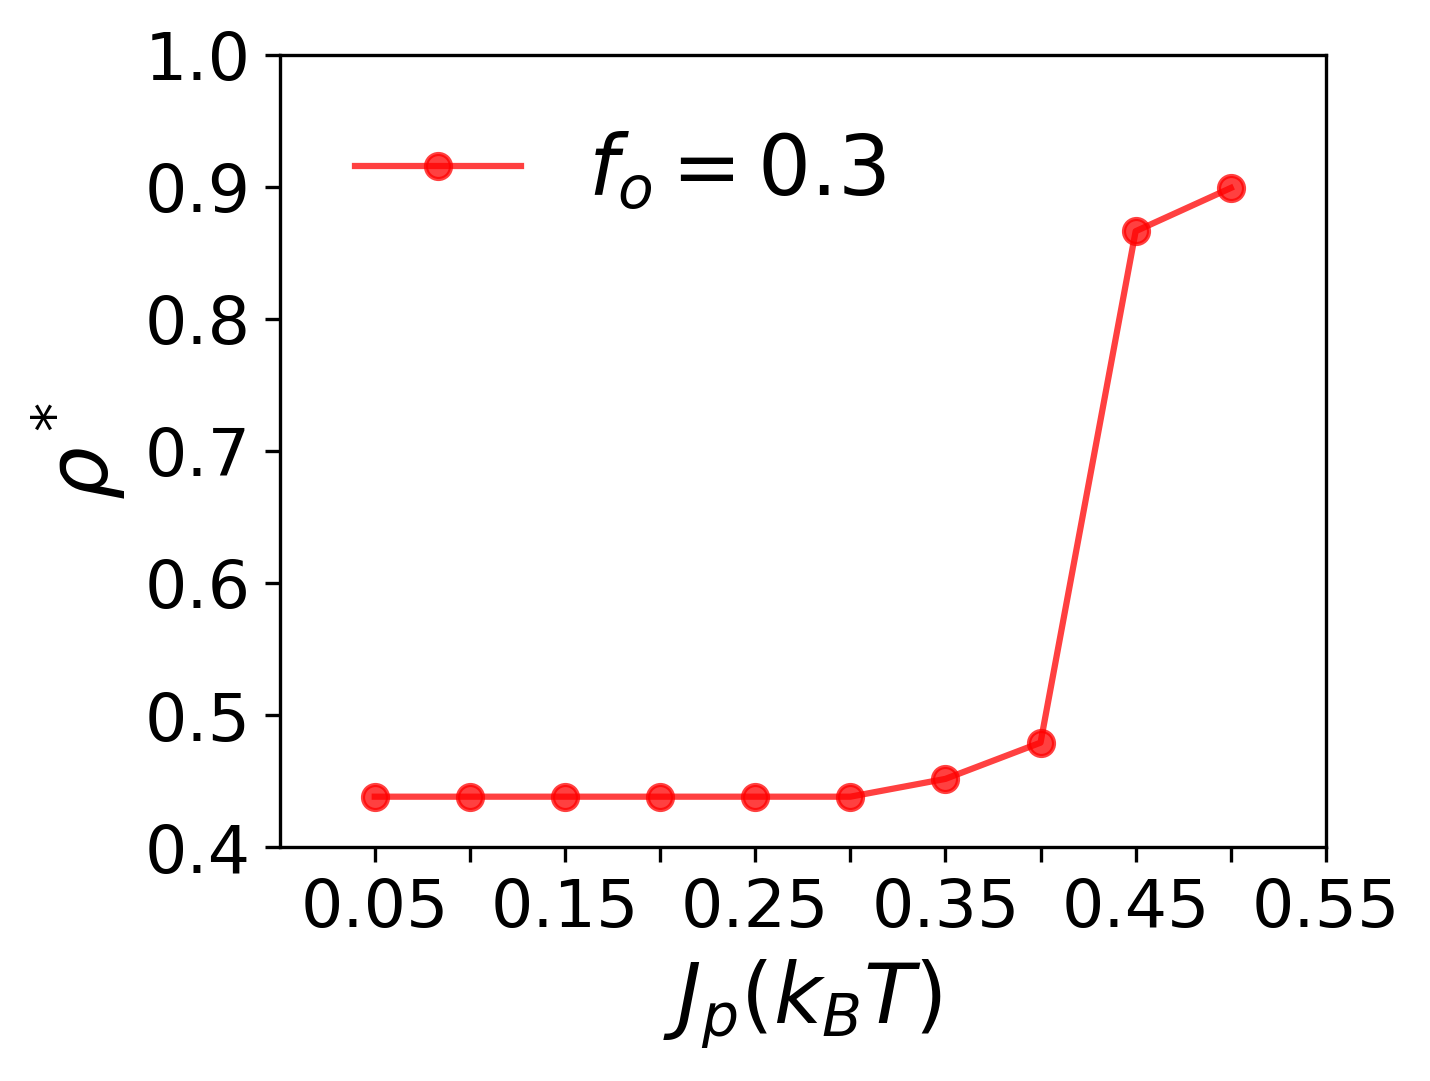

In [64]:
sensitivity_Plot_3 = plt.figure(figsize=(4.5,3.5),dpi=300)
S_P3 = sensitivity_Plot_3.add_subplot(111)
S_P3.plot(Jbs_condensate[1:11], np.asarray(rhoprime_0d3)/0.7,'.-',alpha=0.75, markersize=12, color='red', label='$f_{o}=0.3$')
# S_P3.plot(Jbs_condensate[1:11], rhoprime_0,'.-',alpha=0.75, markersize=12, label='$f_{o}=0$')
# repeat the above calculations for obstacle fraction =0 to obtained the data used in the line above

S_P3.tick_params(labelsize=16)
S_P3.set_xticks(np.arange(0.05,0.6,0.05))
S_P3.set_xticklabels([0.05,'',0.15,'',0.25,'',0.35,'',0.45,'',0.55])
S_P3.set_xlabel('$J_p(k_BT)$',fontsize=20)
S_P3.set_ylabel(r'$\rho^*$',fontsize=20)
S_P3.set_ylim([0.5,1])
S_P3.set_ylim([0.4,1])
S_P3.set_yticks(np.arange(0.4,1.01,0.1))

S_P3.set_xlim([0,0.55])
S_P3.legend(loc='upper left',fontsize=20,ncol=1,frameon=False)